In [51]:
import pywt
import numpy as np
import cv2
import os
import tifffile as tiff
from osgeo import gdal
import math

In [135]:
# Directory information
train = 'dec/'
test  = 'may/'
TEST = False
VIZ = False
output = 'output/'
dec_train = os.listdir(train)
may_test = os.listdir(test)

In [136]:
# Load individual channels
image_ = []
dwt_ = []

if TEST:
    dir_ = test
    iter_ = may_test
else:
    dir_ = train
    iter_ = dec_train
    
for i, file in enumerate(iter_):
    if "Store"  in file:
        continue
        
    arr = np.load(dir_ + file, allow_pickle=True)['data']
    image_.append(arr[:,:,:5])
    index = 0
    a = np.zeros((math.ceil(arr[:,:,:5].shape[0] / 2), math.ceil(arr[:,:,:5].shape[1] / 2), 15))
    
    for j in range(5):
        coeffs = pywt.dwt2(arr[:,:,j], 'haar')
        
        # Create an array to save
        a[:,:,index] = coeffs[1][0]
        a[:,:,index + 1] = coeffs[1][1]
        a[:,:,index + 2] = coeffs[1][2]
        index += 3
        
        dwt_.append(a)
        
    width = a.shape[0]
    height = a.shape[1]
    
    # Obtain the label
    file = file.split('.')[0]
    file = ''.join(filter(lambda x: not x.isdigit(), file)).lower()
    file = file.replace(' ', '_')
    
    if not TEST:
        try:
            # Create target Directory
            os.mkdir(output + file)

        except FileExistsError:
            pass
    
    # Parameters to divide the image
    div_x = int(width / 2)
    div_y = int(height / 2)
    
    if VIZ:
        np.save(file + '.npy', a)
        continue
    
    # Split based on the four quadrants
    if not TEST:
        np.save(output + file + "/" + file + str(i) + '0.npy', a[:div_x, :div_y, :])
        np.save(output + file + "/" + file + str(i) + '1.npy', a[:div_x, div_y:, :])
        np.save(output + file + "/" + file + str(i) + '2.npy', a[div_x:, :div_y, :])
        np.save(output + file + "/" + file + str(i) + '3.npy', a[div_x:, div_y:, :])
    else:
        np.save(output + file + str(i) + '0.npy', a[:div_x, :div_y, :])
        np.save(output + file + str(i) + '1.npy', a[:div_x, div_y:, :])
        np.save(output + file + str(i) + '2.npy', a[div_x:, :div_y, :])
        np.save(output + file + str(i) + '3.npy', a[div_x:, div_y:, :])
    

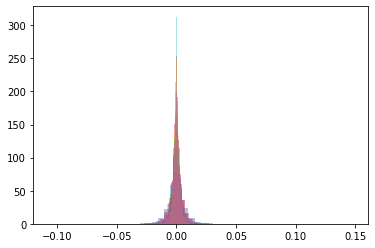

In [123]:
import random
import seaborn as sns

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(18)]

for file in iter_: 
    # Obtain the label
    file = file.split('.')[0]
    file = ''.join(filter(lambda x: not x.isdigit(), file)).lower()
    file = file.replace(' ', '_') + '.npy'
    arr = np.load("viz/" + file, allow_pickle=True)
    
    sns.distplot(arr[:,:,14], kde=False, norm_hist=True)    

In [86]:
dwt_[1].shape

(57, 71, 15)

In [6]:
pwd

'/Users/aaron/Desktop/URECA/parse_data'